Taxi Prediction




<bold>Problem Statement</bold>
The problem in the New York City Taxi Fare Prediction project is to predict the fare amount for a taxi ride in New York City, given certain features of the ride such as pickup and dropoff locations, pickup and dropoff dates and times, passenger count, and distance traveled. The goal of the project is to develop a machine learning model that can accurately predict the fare amount based on these features. This problem is important because it can help taxi companies and passengers estimate the cost of a ride in advance, and it can also inform policies related to taxi fares and regulations.

In the New York City Taxi Fare Prediction project, I should use regression since the problem is to predict a continuous numerical value, which is the fare amount for a taxi ride. Regression algorithms are used for predicting continuous numerical values, whereas classification algorithms are used for predicting discrete categorical values. Therefore, you should use a regression algorithm, such as linear regression, decision trees, or random forests, to build a model that can predict the fare amount based on the input features.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from math import sin, cos, sqrt, atan2, radians


In [5]:
df=pd.read_csv("./TaxiFare.csv")



In [6]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [7]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [8]:
df.shape

(50000, 8)

In [9]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [10]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


<AxesSubplot: >

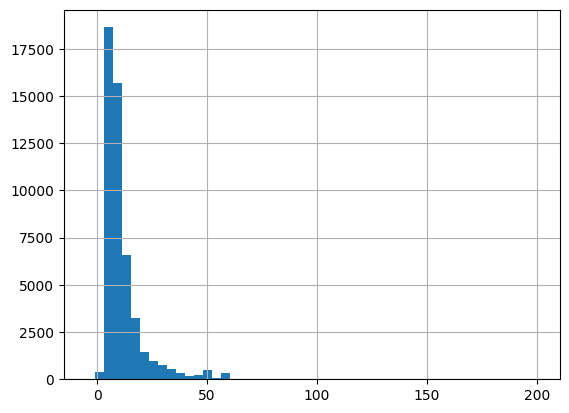

In [11]:
df['amount'].hist(bins=50)


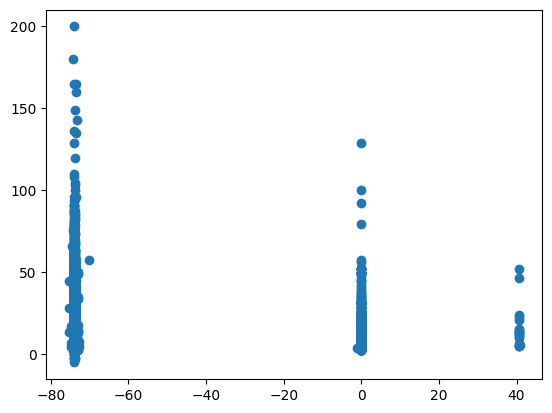

In [12]:
# Plot scater graph
plt.scatter(df['longitude_of_pickup'],df['amount'])


In [13]:
# Calculate the distance travelled

In [14]:
def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

# Calculate the distance traveled for each trip
df['distance'] = df.apply(lambda row: calculate_distance(row['latitude_of_pickup'], row['longitude_of_pickup'], row['latitude_of_dropoff'], row['longitude_of_dropoff']), axis=1)


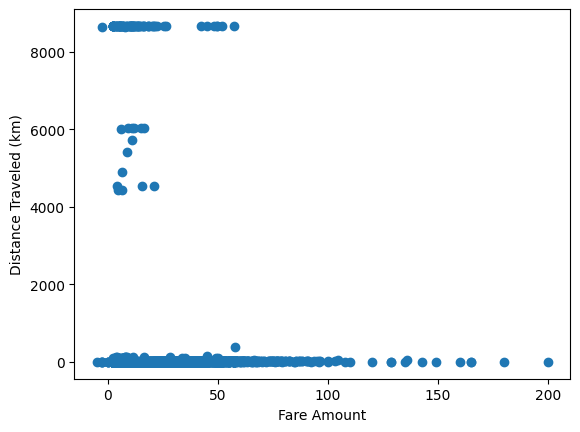

In [15]:
fig, ax = plt.subplots()
ax.scatter(df['amount'], df['distance'])
ax.set_xlabel('Fare Amount')
ax.set_ylabel('Distance Traveled (km)')
plt.show()

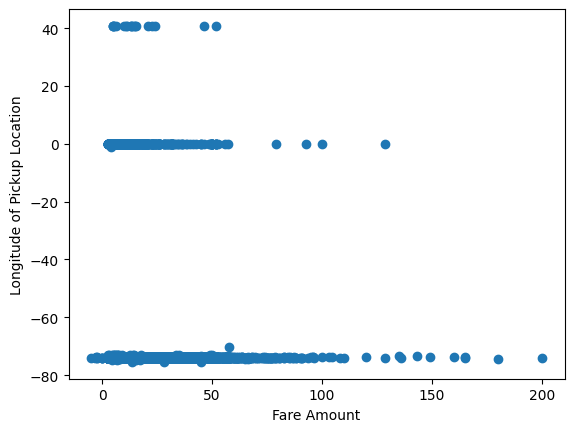

In [16]:

# Create scatter plot of fare amount vs. longitude of pickup location
fig, ax = plt.subplots()
ax.scatter(df['amount'], df['longitude_of_pickup'])
ax.set_xlabel('Fare Amount')
ax.set_ylabel('Longitude of Pickup Location')
plt.show()

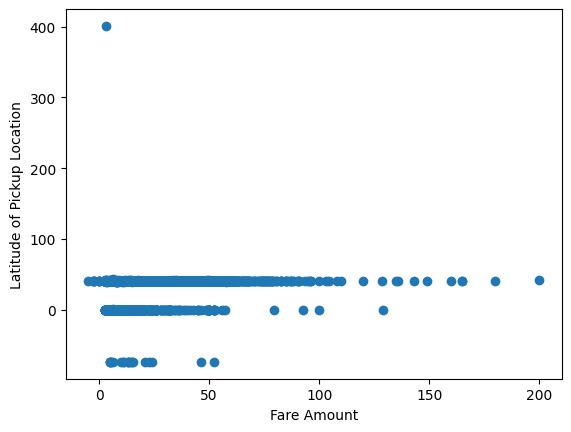

In [17]:
# Create scatter plot of fare amount vs. latitude of pickup location
fig, ax = plt.subplots()
ax.scatter(df['amount'], df['latitude_of_pickup'])
ax.set_xlabel('Fare Amount')
ax.set_ylabel('Latitude of Pickup Location')
plt.show()

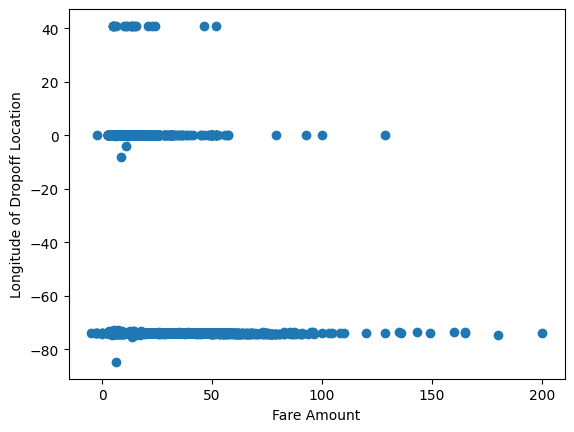

In [18]:
fig, ax = plt.subplots()
ax.scatter(df['amount'], df['longitude_of_dropoff'])
ax.set_xlabel('Fare Amount')
ax.set_ylabel('Longitude of Dropoff Location')
plt.show()

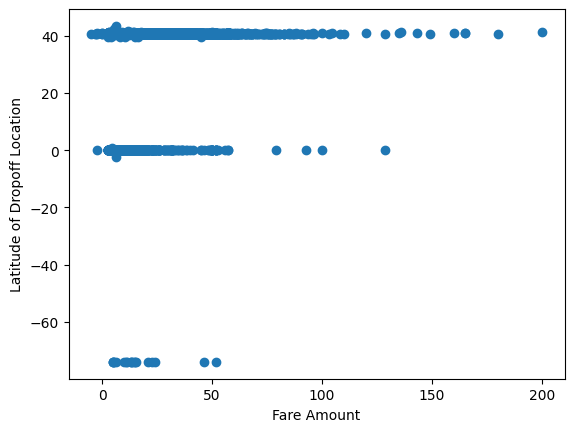

In [19]:
fig, ax = plt.subplots()
ax.scatter(df['amount'], df['latitude_of_dropoff'])
ax.set_xlabel('Fare Amount')
ax.set_ylabel('Latitude of Dropoff Location')
plt.show()


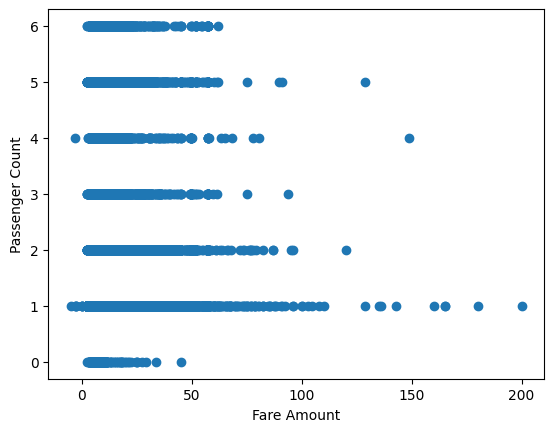

In [20]:
fig, ax = plt.subplots()
ax.scatter(df['amount'], df['no_of_passenger'])
ax.set_xlabel('Fare Amount')
ax.set_ylabel('Passenger Count')
plt.show()

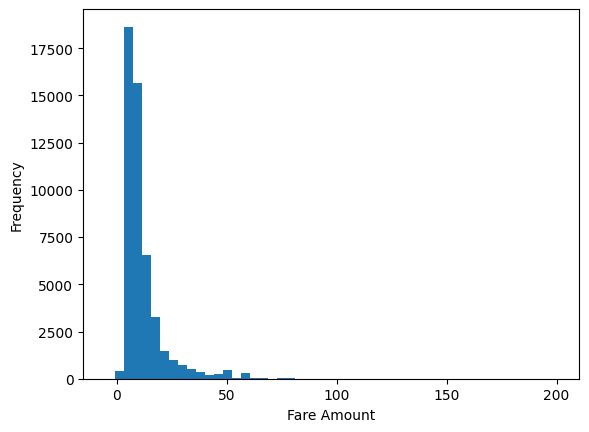

In [21]:
fig, ax = plt.subplots()
ax.hist(df['amount'], bins=50)
ax.set_xlabel('Fare Amount')
ax.set_ylabel('Frequency')
plt.show()

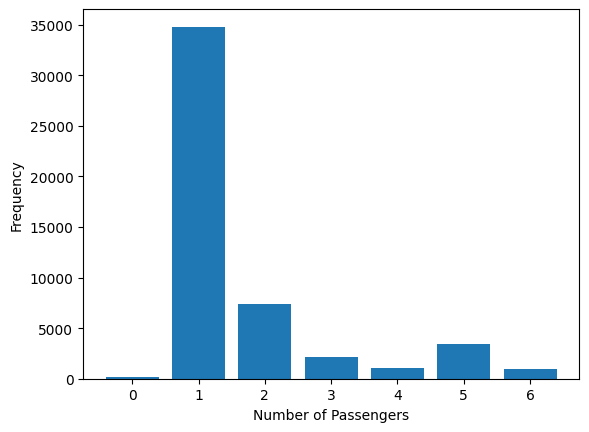

In [22]:
fig, ax = plt.subplots()
ax.bar(df['no_of_passenger'].value_counts().index, df['no_of_passenger'].value_counts().values)
ax.set_xlabel('Number of Passengers')
ax.set_ylabel('Frequency')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_9444\3354758088.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


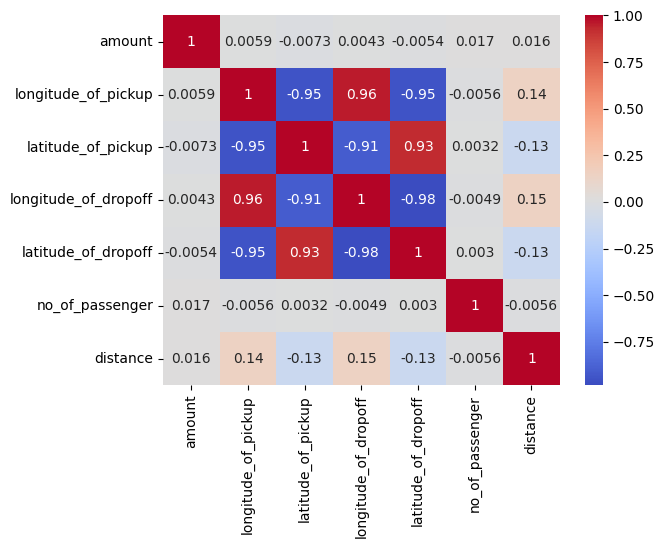

In [23]:
corr_matrix = df.corr()
fig, ax = plt.subplots()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [24]:
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'])

In [25]:
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'])


In [26]:
df.dtypes

unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
distance                            float64
dtype: object

In [27]:
# Extract hour of the day from pickup datetime
df['hour_of_day'] = df['date_time_of_pickup'].dt.hour


In [28]:
df['year'] = df['date_time_of_pickup'].dt.year
df['month'] = df['date_time_of_pickup'].dt.month
df['day'] = df['date_time_of_pickup'].dt.day
df['hour'] = df['date_time_of_pickup'].dt.hour

In [29]:
df['year'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

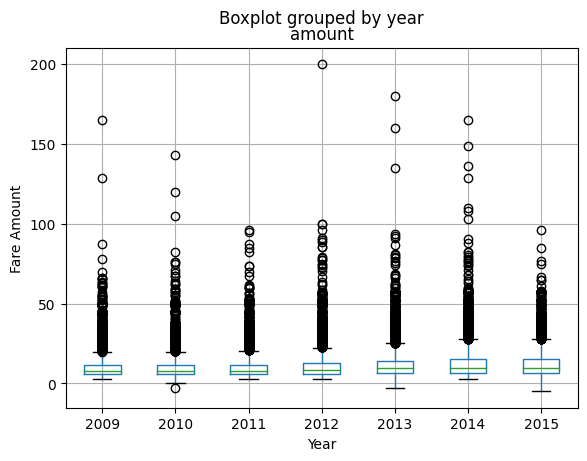

In [30]:
df['year'] = pd.Categorical(df['year'])
fig, ax = plt.subplots()
df.boxplot(column='amount', by='year', ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Fare Amount')
plt.show()

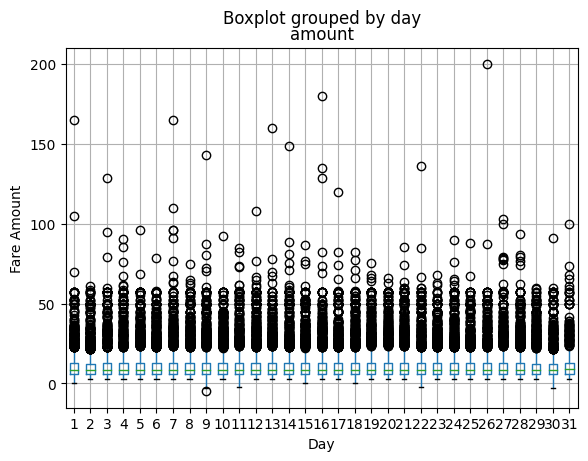

In [31]:
df['day']=pd.Categorical(df['day'])
fig, ax = plt.subplots()
df.boxplot(column='amount', by='day', ax=ax)
ax.set_xlabel('Day')
ax.set_ylabel('Fare Amount')
plt.show()

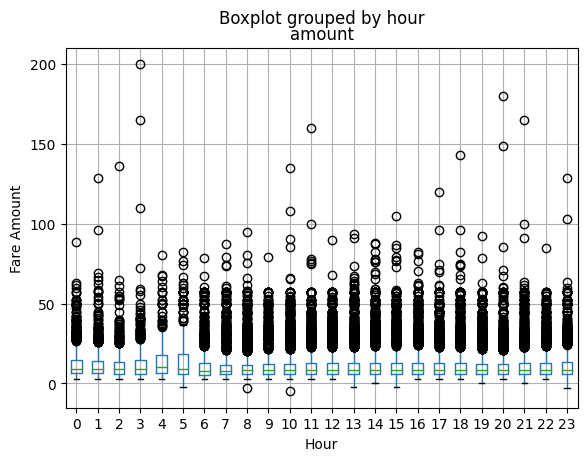

In [32]:
df['hour']=pd.Categorical(df['hour'])
fig, ax = plt.subplots()
df.boxplot(column='amount', by='hour', ax=ax)
ax.set_xlabel('Hour')
ax.set_ylabel('Fare Amount')
plt.show()


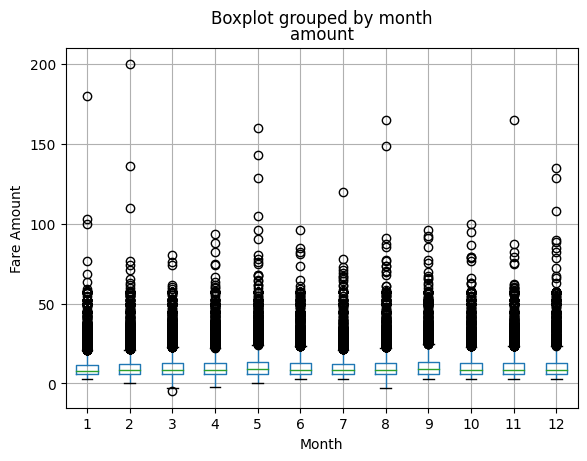

In [33]:
df['month']=pd.Categorical(df['month'])
fig, ax = plt.subplots()
df.boxplot(column='amount', by='month', ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Fare Amount')
plt.show()

In [34]:
df.dtypes

unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
distance                            float64
hour_of_day                           int64
year                               category
month                              category
day                                category
hour                               category
dtype: object

Data Preparation

In [35]:
df.dtypes



unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
distance                            float64
hour_of_day                           int64
year                               category
month                              category
day                                category
hour                               category
dtype: object

In [36]:
df_model = df[['date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger', 'amount']]


In [37]:
df_model['date_time_of_pickup'] = pd.to_datetime(df_model['date_time_of_pickup'])

C:\Users\hp\AppData\Local\Temp\ipykernel_9444\3563605663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['date_time_of_pickup'] = pd.to_datetime(df_model['date_time_of_pickup'])


In [38]:
df['hour'] = df['date_time_of_pickup'].dt.hour
df['dayofweek'] = df['date_time_of_pickup'].dt.dayofweek
df['month'] = df['date_time_of_pickup'].dt.month


In [39]:
df.dtypes


unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
distance                            float64
hour_of_day                           int64
year                               category
month                                 int64
day                                category
hour                                  int64
dayofweek                             int64
dtype: object

In [40]:
# Drop the date_time_of_pickup column
df = df.drop('date_time_of_pickup', axis=1)

In [41]:
df.drop('unique_id', axis=1, inplace=True)


Linear Regression RMSE Value 9.543713580689518

 standardization and then fit a linear regression model 

In [42]:
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]


In [43]:
numerical_cols

['amount',
 'longitude_of_pickup',
 'latitude_of_pickup',
 'longitude_of_dropoff',
 'latitude_of_dropoff',
 'no_of_passenger',
 'distance',
 'hour_of_day',
 'month',
 'hour',
 'dayofweek']

In [44]:
X_train

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Fit linear regression model to standardized data
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)


KeyError: "['amount', 'distance', 'hour_of_day', 'month', 'hour', 'dayofweek'] not in index"

In [ ]:
df.dtypes


amount                   float64
longitude_of_pickup      float64
latitude_of_pickup       float64
longitude_of_dropoff     float64
latitude_of_dropoff      float64
no_of_passenger            int64
distance                 float64
hour_of_day                int64
year                    category
month                      int64
day                     category
hour                       int64
dayofweek                  int64
dtype: object

In [ ]:
print(X_train.columns)

Index(['longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff',
       'latitude_of_dropoff', 'no_of_passenger', 'distance', 'hour_of_day',
       'year', 'month', 'day', 'hour', 'dayofweek'],
      dtype='object')
